In [23]:
import pandas as pd

In [ ]:
sentiment_df = pd.read_csv('csv_files/fear_greed_index.csv')
trader_df = pd.read_csv('csv_files/historical_data.csv')

In [10]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

In [20]:
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce')
trader_df.fillna(0, inplace=True)

In [12]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [21]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

## Average Profitability by Market Sentiment

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64


<Axes: title={'center': 'Average Profitability by Market Sentiment'}, xlabel='classification'>

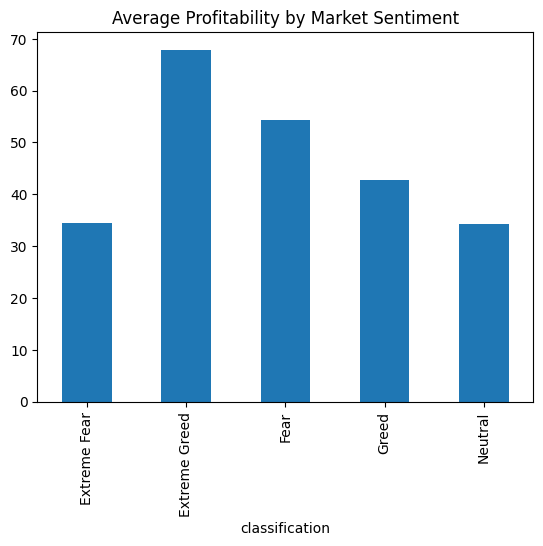

In [25]:
profit_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
print(profit_by_sentiment)
profit_by_sentiment.plot(kind='bar', title='Average Profitability by Market Sentiment')

## Total Trading Volume by Market Sentiment

classification
Extreme Fear     1.144843e+08
Extreme Greed    1.244652e+08
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Name: Size USD, dtype: float64


<Axes: title={'center': 'Total Trading Volume by Market Sentiment'}, xlabel='classification'>

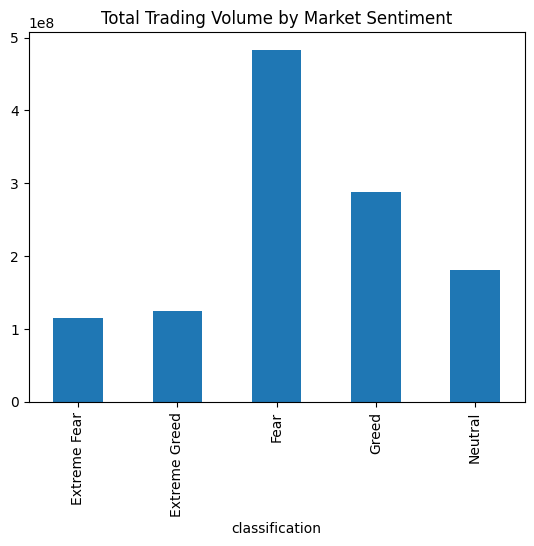

In [15]:
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum()
print(volume_by_sentiment)
volume_by_sentiment.plot(kind='bar', title='Total Trading Volume by Market Sentiment')

## Buy vs. Sell Behavior by Sentiment

Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717


<Axes: title={'center': 'Buy vs. Sell Behavior by Sentiment'}, xlabel='classification'>

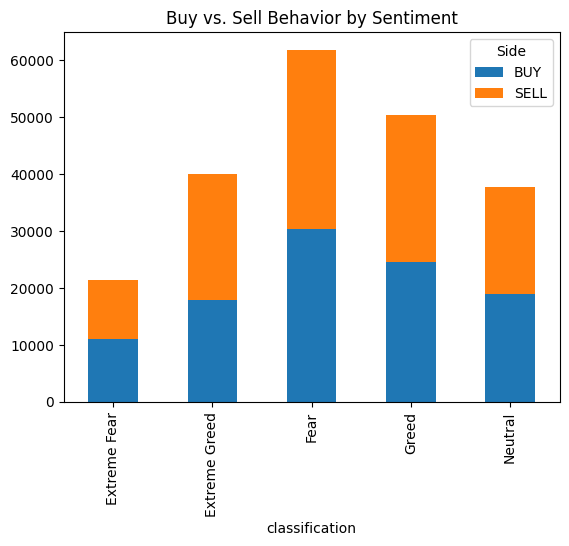

In [17]:
behavior_by_sentiment = pd.crosstab(merged_df['classification'], merged_df['Side'])
print(behavior_by_sentiment)
behavior_by_sentiment.plot(kind='bar', stacked=True, title='Buy vs. Sell Behavior by Sentiment')

## Saving the charts in the output 

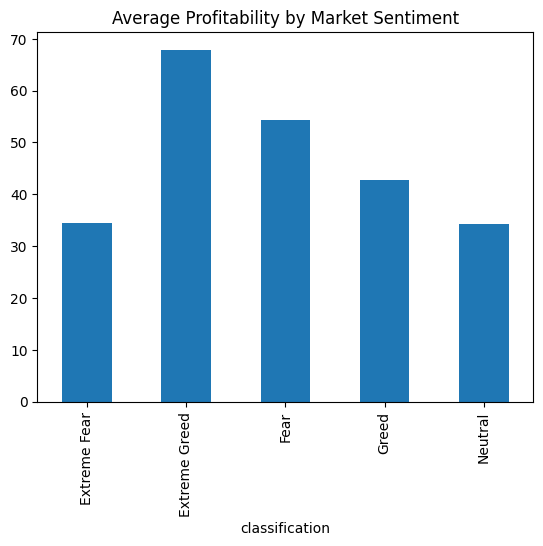

In [32]:
import matplotlib.pyplot as plt
profit_by_sentiment.plot(kind='bar', title='Average Profitability by Market Sentiment')
plt.savefig('outputs/profitability_chart.png', bbox_inches='tight')

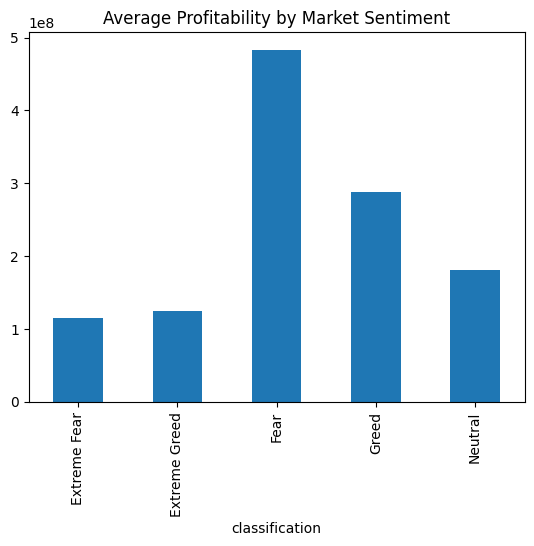

In [33]:
import matplotlib.pyplot as plt
volume_by_sentiment.plot(kind='bar', title='Average Profitability by Market Sentiment')
plt.savefig('outputs/Volume_chart.png', bbox_inches='tight')

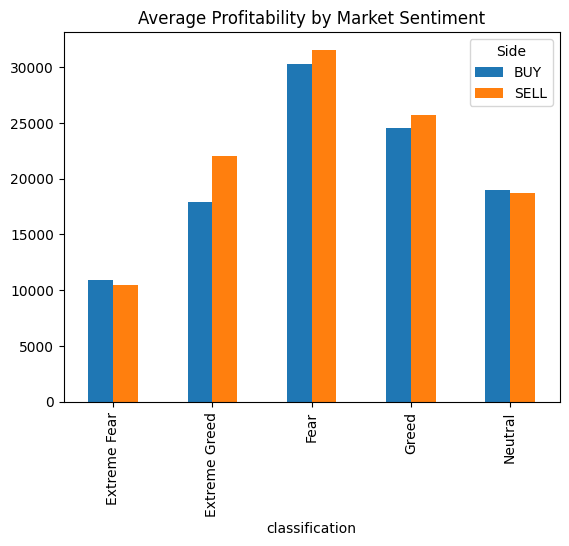

In [34]:
import matplotlib.pyplot as plt
behavior_by_sentiment.plot(kind='bar', title='Average Profitability by Market Sentiment')
plt.savefig('outputs/behaviour_chart.png', bbox_inches='tight')